In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('/content/drive/MyDrive/Titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Titanic/test.csv')
test_ids = test['PassengerId']

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


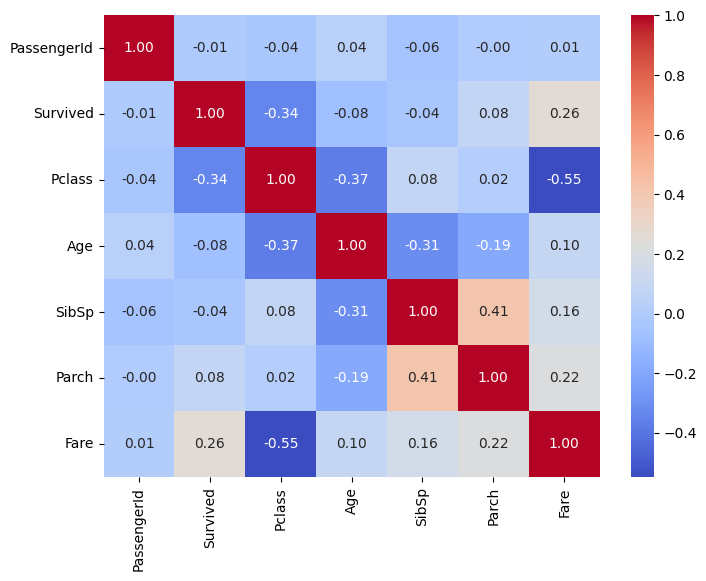

In [6]:
corr = train.corr(numeric_only=True)   # chỉ lấy cột số
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

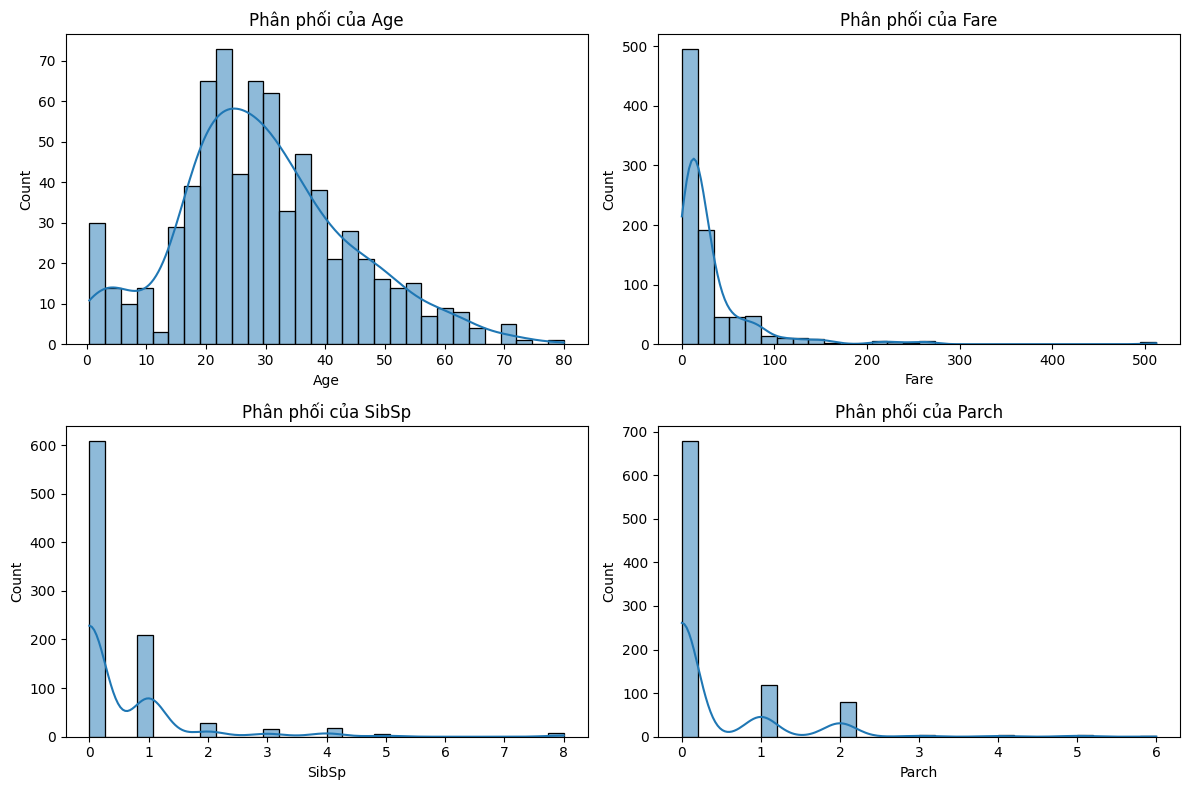

In [7]:
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']

plt.figure(figsize=(12,8))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)  # 2 hàng, 2 cột
    sns.histplot(train[col], bins=30, kde=True)
    plt.title(f'Phân phối của {col}')

plt.tight_layout()
plt.show()

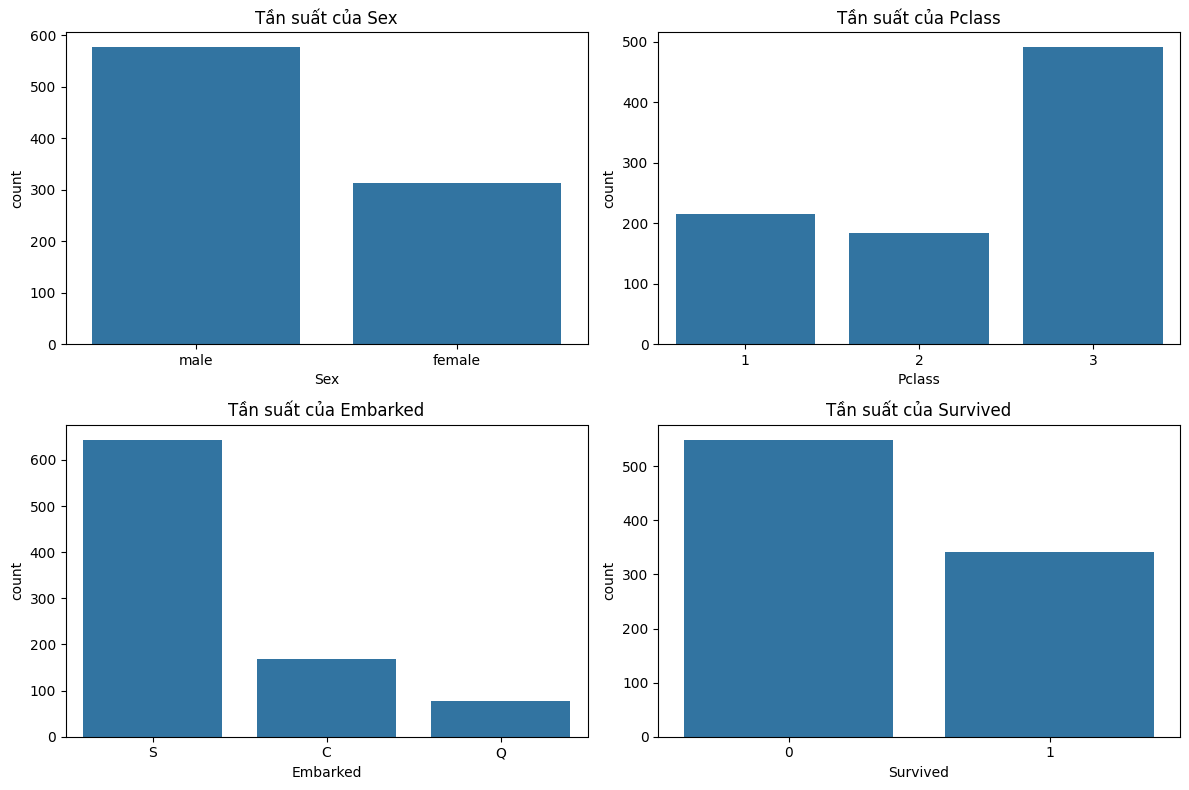

In [8]:
cat_cols = ['Sex', 'Pclass', 'Embarked', 'Survived']

plt.figure(figsize=(12,8))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)  # 2 hàng, 2 cột
    sns.countplot(x=col, data=train)
    plt.title(f'Tần suất của {col}')

plt.tight_layout()
plt.show()

## Tạo title từ name

In [9]:
for df in [train, test]:
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

for df in [train, test]:
    df['Title'] = df['Title'].replace(['Lady','Countess','Capt','Col',
                                       'Don','Dr','Major','Rev','Sir',
                                       'Jonkheer','Dona'], 'Rare')
    df['Title'] = df['Title'].replace(['Mlle','Ms'], 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-2549334868.py:2: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


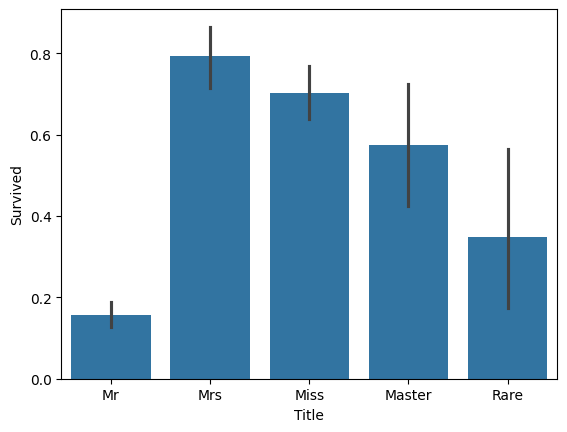

In [10]:
sns.barplot(x='Title', y='Survived', data=train)
plt.show()

## Tạo Familysize

In [11]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [12]:
train["Last_Name"] = train["Name"].apply(lambda x: x.split(",")[0].strip())
test["Last_Name"] = test["Name"].apply(lambda x: x.split(",")[0].strip())

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Last_Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,Allen


## Clean Data

In [14]:
# def clean(data):
#   data = data.drop(['Cabin','PassengerId'],axis=1)
#   cols = ['SibSp','Parch','Fare']
#   for col in cols:
#     data[col].fillna(data[col].median(),inplace=True)

#   return data

In [15]:
train_cp = train.copy()

In [16]:
# train_cp = clean(train_cp)
# test = clean(test)

In [17]:
train_cp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Last_Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,Allen


In [18]:
DEFAULT_SURV = 0.5
fam_rules = {}

for (lname, fare), grp in train_cp.groupby(["Last_Name", "Fare"], dropna=False):
    if len(grp) <= 1:
        continue
    smax = grp["Survived"].max()
    smin = grp["Survived"].min()
    if smax == 1:
        fam_rules[("LF", lname, fare)] = 1.0
    elif smin == 0:
        fam_rules[("LF", lname, fare)] = 0.0

In [19]:
# Quy tắc theo Ticket trong TRAIN
for ticket, grp in train_cp.groupby("Ticket", dropna=False):
    if len(grp) <= 1:
        continue
    smax = grp["Survived"].max()
    smin = grp["Survived"].min()
    if smax == 1:
        fam_rules[("T", ticket)] = 1.0
    elif smin == 0:
        fam_rules[("T", ticket)] = 0.0

In [20]:
def infer_family_survival(row):
    # Ưu tiên quy tắc theo Last_Name + Fare
    key1 = ("LF", row["Last_Name"], row["Fare"])
    if key1 in fam_rules:
        return fam_rules[key1]
    # Sau đó đến Ticket
    key2 = ("T", row["Ticket"])
    if key2 in fam_rules:
        return fam_rules[key2]
    return DEFAULT_SURV

train_cp["Family_Survival"] = train_cp.apply(infer_family_survival, axis=1)
test["Family_Survival"] = test.apply(infer_family_survival, axis=1)

In [21]:
most_common_embarked = train_cp['Embarked'].mode()[0]
train_cp['Embarked'] = train_cp['Embarked'].fillna(most_common_embarked)

In [22]:
train_cp['Sex'] = train_cp['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

train_cp= pd.get_dummies(train_cp, columns=['Embarked'], drop_first=True)
test= pd.get_dummies(test, columns=['Embarked'], drop_first=True)

title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}
for df in [train_cp, test]:
    df['Title'] = df['Title'].map(title_mapping)
    df['Title'] = df['Title'].fillna(0)


In [23]:
train_cp.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,FamilySize,Last_Name,Family_Survival,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1,2,Braund,0.5,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,3,2,Cumings,0.5,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1,Heikkinen,0.5,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,3,2,Futrelle,1.0,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1,1,Allen,0.5,False,True
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,1,1,Moran,0.5,True,False
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,1,1,McCarthy,0.5,False,True
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,4,5,Palsson,0.0,False,True
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,3,3,Johnson,1.0,False,True
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,3,2,Nasser,1.0,False,False


In [24]:
from sklearn.impute import KNNImputer

# Chọn các cột có thông tin liên quan
features = ['Age','Pclass','Sex','SibSp','Parch','Fare','Title','FamilySize']

# Impute Age
imputer = KNNImputer(n_neighbors=5)
train_cp[features] = imputer.fit_transform(train_cp[features])
test[features] = imputer.transform(test[features])

In [25]:
# Bước 2: Chia nhóm tuổi
bins = [0, 5, 12, 18, 30, 60, 80]
labels = ['baby', 'child', 'teen', 'young_adult', 'adult', 'senior']
for df in [train_cp, test]:
    df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [26]:
train_cp.groupby('AgeGroup')['Survived'].mean() * 100

/tmp/ipython-input-2028737479.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_cp.groupby('AgeGroup')['Survived'].mean() * 100


,Survived
AgeGroup,
baby,70.454545
child,34.615385
teen,43.589744
young_adult,33.776596
adult,39.420290
senior,22.727273


In [27]:
train_cp = pd.get_dummies(train_cp, columns=['AgeGroup'], drop_first=True)
test = pd.get_dummies(test, columns=['AgeGroup'], drop_first=True)

##
ád

In [28]:
drop_cols = ["Name","PassengerId","SibSp","Parch","Ticket","Cabin","Embarked","Fare","Age","AgeGroup","Last_Name"]
train_cp = train_cp.drop(columns=[c for c in drop_cols if c in train_cp.columns])
test = test.drop(columns=[c for c in drop_cols if c in test.columns])

In [29]:
X = train_cp.reset_index(drop=True)
X_test = test.reset_index(drop=True)

In [30]:
from sklearn.preprocessing import StandardScaler

# Tách nhãn (y) ra khỏi dữ liệu huấn luyện
X = train_cp.drop("Survived", axis=1)
y = train_cp["Survived"]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(test)

In [31]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# logreg = LogisticRegression(max_iter=1000, random_state=42)

In [32]:
# Tham số muốn thử
# param_grid = {
#     'C': [0.01, 0.1, 1, 10, 100],      # mức độ regularization
#     'penalty': ['l2', 'l1'],           # kiểu regularization
#     'solver': ['liblinear', 'saga']    # thuật toán tối ưu phù hợp
# }

In [33]:
# from sklearn.model_selection import StratifiedKFold, GridSearchCV

# grid_search = GridSearchCV(
#     estimator=logreg,
#     param_grid=param_grid,
#     cv=10,             # 5-fold cross-validation
#     scoring='accuracy',
#     n_jobs=-1
# )

In [34]:
# grid_search.fit(X_scaled, y)

# print("✅ Best parameters:", grid_search.best_params_)
# print("✅ Best score:", grid_search.best_score_)

In [35]:
# Dùng mô hình tốt nhất
# best_logreg = grid_search.best_estimator_

In [36]:
# pred = best_logreg.predict(X_test_scaled)

In [37]:
# submission = pd.DataFrame({
#     "PassengerId": test_ids.values,  # từ file test gốc
#     "Survived": pred
# })

In [38]:
# submission.to_csv("submission.csv", index=False)

## thử


In [39]:
# train_cp.head(30)

In [40]:
# train_cp['Fare'] = train_cp['Fare'].apply(np.log1p)
# test['Fare'] = test['Fare'].apply(np.log1p)

# train_cp['SibSp'] = train_cp['SibSp'].apply(np.log1p)
# test['SibSp'] = test['SibSp'].apply(np.log1p)

In [41]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# for col in ['Age', 'Fare', 'SibSp', 'Parch', 'FarePerClass']:
#     train_cp[col] = scaler.fit_transform(train_cp[[col]])
#     test[col] = scaler.transform(test[[col]])

In [42]:
# from sklearn.model_selection import train_test_split

# X = train_cp.drop('Survived', axis=1)
# y = train_cp['Survived']

# X_train, X_val, y_train, y_val = train_test_split(
#     X, y, test_size=0.2, random_state=0, stratify=y
# )

In [43]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# models = {
#     'Logistic Regression': LogisticRegression(random_state=0, max_iter=1000),
#     'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=200),
#     'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1),
#     'SVM': SVC(kernel='rbf', probability=True, random_state=42)
# }

# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_val)
#     y_prob = model.predict_proba(X_val)[:,1]

#     acc = accuracy_score(y_val, y_pred)
#     f1 = f1_score(y_val, y_pred)
#     roc_auc = roc_auc_score(y_val, y_prob)

#     print(f"{name} Results:")
#     print(f"  Accuracy: {acc:.4f}")
#     print(f"  F1 Score: {f1:.4f}")
#     print(f"  ROC AUC:  {roc_auc:.4f}")
#     print("-" * 30)

In [44]:
# model.fit(X_train, y_train)

# train_acc = model.score(X_train, y_train)
# val_acc = model.score(X_val, y_val)

# print("Train accuracy:", train_acc)
# print("Validation accuracy:", val_acc)

In [45]:
# clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)

In [46]:
# predictions = clf.predict(X_val)
# accuracy_score(y_val, predictions)

In [47]:
# submission_preds = clf.predict(test)

In [48]:
# submission = pd.DataFrame({
#     "PassengerId": test_ids.values,
#     "Survived": submission_preds
# })

In [49]:
# submission.to_csv("submission_lg_222.csv", index=False)

## knn

In [50]:
param_grid = {
    "n_neighbors": [6,7,8,9,10,11,12,14,16,18,20,22],
    "weights": ["uniform", "distance"],
    "leaf_size": list(range(1, 50, 5)),
    "algorithm": ["auto"],   # có thể thêm 'ball_tree','kd_tree' nếu muốn thử
    "p": [1, 2],             # Manhattan / Euclidean
}

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1,
    verbose=1
)
grid.fit(X_scaled, y)

print("Best ROC_AUC:", grid.best_score_)
print("Best Estimator:", grid.best_estimator_)

Fitting 10 folds for each of 480 candidates, totalling 4800 fits
Best ROC_AUC: 0.8963838383838383
Best Estimator: KNeighborsClassifier(leaf_size=26, n_neighbors=14, p=1)


In [52]:
best_knn = grid.best_estimator_
best_knn.fit(X_scaled, y)
y_pred = best_knn.predict(X_test_scaled).astype(int)

In [53]:
sub = pd.DataFrame({
    "PassengerId": test_ids.values,
    "Survived": y_pred
})
sub.to_csv("submission_knn_1.csv", index=False)


Saved to /submission.csv
